## Binarne datoteke - in nizi bajtov

Obstajajo datoteke, ki niso besedilne. Očiten primer so datoteke, ki shranjujejo slike, zvok ali filme. Manj očiten primer je datoteka z Wordovim dokumentom, ki sicer vsebuje besedilo, vendar gre v resnici za zip (če .docx preimenujete v .zip, ga v resnici lahko odzipate). Vsebine teh datotek torej ne moremo brati kot besedilo - torej kot številke, ki pomenijo znake - temveč le kot številke.

Odprimo datoteko .gif in jo preberimo v niz.

In [1]:
gif = open("kocka.gif", "rb")
s = gif.read()
s[:30]

b'GIF87aj\x00\xd6\x00\xd5\x00\x00\x00\x00\x00\xb4$\x00\xb4$U\xd8$\x00\xd8$U\xb4H'

Da gre za binarno datoteko, smo povedali tako, da smo kot drugi argument podali `"rb"`: `r` za branje in `b` za binarno. Tako kot prej smo z `read()` prebrali celotno datoteko, le da smo zdaj previdno izpisali le prvih 30 znakov.

Kar smo dobili, je videti kot niz; začne se s črkami GIF89a, sledijo pa znaki z nekimi čudnimi kodami; ker so izven običajnega obsega ASCII (32-127), je Python izpisal njihove kode. Prvi trije za GIF89a imajo kot 233, 0 in 199, zato jih je, po šestnajstiško, izpisal kot `\x01`, `\x04` in `\xe5`.

V resnici pa ne gre za čisto pravi niz - sumljiv je tisti `b` pred začetnim narekovajem. Gre za nov podatkovni tip: imenuje se `bytes`. Navzven je zelo zelo podoben nizu; ne le, da se podobno izpisuje, temveč ima tudi običajne metode nizov, kot so `strip`, `find` in `join`. Razlikuje se v par podrobnostih.

Če želimo dobiti prvi, tretji, osemnajsti... znak tega "niza", ne dobimo črke, temveč številko.

In [2]:
s[0]

71

In [3]:
s[1]

73

In [4]:
s[2]

70

In [5]:
s[6]

106

In [6]:
s[8]

214

Reči tipa `bytes` so torej križanec med seznami in nizi: navzven so videti kot nizi, navznoter pa
so - kot nam razodene indeksiranje - pravzaprav seznami 8-bitni števil, torej števil med 0 in 255.

Ker so `s[0]`, `s[1]` in `s[2]` številke 71, 73 in 70, ki (po ASCII) ustrezajo znakom G, I in F,
jih je Python izpisal kot G, I in F. Tisto, kar ni podobno ničemur, je izpisal z onimi `\x`.

Mimogrede, gif, ki smo ga naložili, je velik 106x214 točk. Kar je slučajno ravno vsebina `s[6]` in `s[8]`. (Sem rekel, da so `bytes` številke med 0 in 255? GIF pa je lahko tudi večji. Kako je shranjena velikost gifov, večjih od 255 točk, je velika skrivnost, ki jo znajo razriti samo tisti, ki znajo uporabljati Google.)

O branju binarnih datotek nimamo povedati kaj prida več. Razen tega, da se je po njih smiselno sprehajati: z metodo `seek` lahko skočimo na poljubno mesto v datoteki, metoda `tell` pa pove, kje v datoteki smo.


## Pretvarjanje med `str` in `bytes`

Vzemimo niz

In [7]:
s = "Večna pot"
len(s)

9

Če bi ga želeli zapisati v datoteko, bi morali ob odpiranju datoteke povedati, na kakšen način
naj ga zakodira (predvsem zaradi č-ja) ali pa pustiti operacijskemu sistemu, da se odloči.
"Zakodirati" tu pomeni spremeniti v številke. Če torej ob odpiranju datoteke zahtevamo `encoding="cp1250"`, se bo tisti nesrečni `č` zapisal drugače, kot če zahtevamo `encoding="utf8"` (ali nič, kar je v normalnih operacijskih sistemih pri nas isto kot utf-8).

Včasih želimo to pretvorbo opraviti sami. Iz niza `s` bomo naredili zaporedje številk, skladno
z določenim načinom kodiranja. Kodiranje opravi pa ga metoda `encode`, ki ji kot argument
podamo ime kodeka.

In [8]:
b = s.encode("cp1250")
b

b'Ve\xe8na pot'

In [9]:
len(b)

9

In [10]:
b[2]

232

Še enkrat (tole ni zapleteno, se pa zna zazdeti takšno, če ne bomo pozorno spremljali): nizi
(`str`) imajo metodo `encode`, s katero jih spremenimo v zaporedje števil (`bytes`). V gornjem
primeru smo iz šestih znakov dobili šest številk. Prva je 86, saj je to koda (ki v cp1250, pa tudi
v ASCII) pripada veliki črki V. Druga številka je 232 (`\xe8`), saj le-ta pripada malemu č - v
kodeku cp1250.

Če bi poskusili s kakim drugim kodekom, recimo "cp1252", se to ne bi obneslo.

In [11]:
b = s.encode("cp1252")

UnicodeEncodeError: 'charmap' codec can't encode character '\u010d' in position 2: character maps to <undefined>

Črke "č" v kodnem razporedu cp1250, ki je namenjen zahodnoevropskim jezikom, ni.

Zdaj pa obrnimo. Imamo zaporedje bajtov, `b`. Konkretno, imamo zaporedje števil

In [12]:
list(b)
[86, 101, 232, 110, 97, 32, 112, 111, 116]

[86, 101, 232, 110, 97, 32, 112, 111, 116]

Če želimo spremeniti `b` v niz, v besedilo, moramo te črke "dekodirati". Ob tem moramo povedati,
s kakšnim kodekom. Vemo: cp1250.

In [13]:
b.decode("cp1250")

'Večna pot'

Pa če zgrešimo? Če namesto cp1250 uporabimo cp1252? Tokrat bo delovalo. V bo V in e bo e, saj sta
tadva znaka v vseh kodekih na istem mestu (lepo je biti Američan). Kot tretji znak pa bomo namesto
č dobili pač tisti znak, ki ima v izbranem kodeku kodo 232.

In [14]:
b.decode("cp1252")

'Veèna pot'

Znano? Ste že kdaj videli è namesto č? Recimo v podnapisih v VLC? No, zdaj veste, zakaj: zato, ker je nek program dobil besedilo, zapisano v cp1250, mislil pa je, da je v cp1252, zato je kodo 232 prebral kot è in ne kot č.

Proti temu se borimo tako, da VLC-ju povemo, katero kodno stran uporabljajo naši podnapisi.

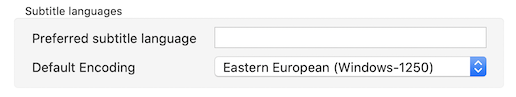

Kako pa deluje stran, ki jo pravkar berete? V katerem kodeku je zapisana, da ima tako è-je kot č-je? V UTF-8, v katerem je lahko zapisano vse.

In [15]:
b = s.encode("utf-8")
b

b'Ve\xc4\x8dna pot'

Čeprav je besedilo dolgo 9 znakov, je zakodirano z 10 števili.

In [16]:
b[2]

196

In [17]:
b[3]

141

Znak `č` se zapiše s zaporedjem 196, 141. Če bi malo pobrskali, bi videli, da se `è` zapiše kot 195, 168. `V` pa se zapiše z eno samo številko, 86, tako kot prej. Vsi ASCII znaki so zapisani z enim bajtom, tako kot prej. (Lepo je biti Američan.) [UTF-8](https://en.wikipedia.org/wiki/UTF-8) je premeteno sestavljen zapis.

Dekodiranje je seveda takšno kot prej, le z drugim kodekom.

In [18]:
b.decode("utf-8")

'Večna pot'

Omenimo še en kodek, ki ga vsakodnevno uporabljate: utf-16.

In [19]:
b = s.encode("utf-16-le")
b

b'V\x00e\x00\r\x01n\x00a\x00 \x00p\x00o\x00t\x00'

In [20]:
len(b)

18

Iz 9 znakov je naredil 18 številk, pri čemer je prva številka vedno enaka koti ASCII (v izpisanem zaporedju lahko preberete V, e, n, a, presledek, p, o in t, druga pa je 0 (`\x00`). Izjema je "č", ki ga je zapisal z zaporedjem 13, 1.

Kdaj to vsakodnevno uporabljate? Ko pišete SMSe. Če v njem ni šumnikov, ga zakodira kot ASCII,
če so, pa kot UTF-16. Ker ta za vsak znak porabi dve številki, so SMSi s šumniki dvakrat daljši - v en SMS gre samo 72 znakov. No, vsaj včasih je bilo tako. Dandanes pa se vse to dogaja v ozadju in v resnici niti ne vemo, ne koliko so dolgi naši SMS-i, ne koliko smo jih poslali.

Sicer pa nisem prepričan, da današnja mladina sploh še ve, kaj je SMS.

## Unicode

UTF-8 in UTF-16 smo razložili malo na hitro.

Celotna zgodba, še vedno na hitro, je takšna. Standard [Unicode](https://en.wikipedia.org/wiki/Unicode) vsakemu znaku predpiše določeno kodo. Možnih kod je 1,111,998. To obilje pokrije vse zahodne in vzhodne jezike, vključno s kitajščino. Vključuje tudi standardizirane emojie. 👍 ima kodo `U+1F44D`. V trenutku pisanja tega besedila obstaja 1367 emojijev v Unicodu. Začasno so dodeljene tudi kode Tolkienovim pisavam. Poskus standardizacije klingonščine je spodletel: "*The Unicode Technical Committee rejected the Klingon proposal in May 2001 on the grounds that research showed almost no use of the script for communication, and the vast majority of the people who did use Klingon employed the Latin alphabet by preference.*"

Skratka: vsakemu znaku je dodeljena koda. Kako se ta koda uporabi, pa je stvar kodeka. Glede na to, koliko znakov imamo in kako velike so kode, bi bilo najpreprosteje uporabljati UTF-32: vsak znak bi bil zapisan z štirimi bajti, pa smo. Vendar bi bila besedila potem štirikrat daljša. Zaradi Kitajcev in Klingonov. Medtem ko bi si človek še upal reči "*ko šljivi Kitajce*", bi bilo "*ko šljivi Klingone*" potencialno usodno.

[UTF-8](https://en.wikipedia.org/wiki/UTF-8) je zvit način zapisovanja, ki najpogosteje uporabljene znake (evropskih jezikov) zapiše z enim bajtom, manj pogoste z dvema in tako naprej. Kako deluje, izveste na povezavi.

Težava z UTF-8 je, da niso vsi znaki enako dolgi. Tako se stoti znak nekega niza ne nahaja nujno na stotem bajtu. Da pridemo do stotega znaka moramo preveriti vse znake do tam. Kar seveda ni sprejemljvo. Zato operacijski sistemi in programski jeziki pogosto interno uporabljajo [UTF-16], ki za vse znake porabi dva bajta. Stoti znak je tako vedno na dvestotem bajtu.

Tudi Python, ki ga uporabljamo mi, interno uporablja UTF-16, čeprav se ob pisanju v datoteke in branju iz njih obnaša, kot da bi bilo vse (privzeto) UTF-8.